In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from jmd_imagescraper.core import *
from pathlib import Path

In [ ]:
def plot_results(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(0, 1.1)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(-0.1,5)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [44]:
discriminator = tf.keras.Sequential()
discriminator.add(tf.keras.layers.Input(shape=(64, 64, 3)))
discriminator.add(tf.keras.layers.Conv2D(64, (4, 4), strides=2, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
discriminator.add(tf.keras.layers.BatchNormalization())

discriminator.add(tf.keras.layers.Conv2D(128, (4, 4), strides=2, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
discriminator.add(tf.keras.layers.BatchNormalization())

discriminator.add(tf.keras.layers.Conv2D(128, (4, 4), strides=2, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
discriminator.add(tf.keras.layers.BatchNormalization())

discriminator.add(tf.keras.layers.Flatten())
discriminator.add(tf.keras.layers.Dropout(0.2))
discriminator.add(tf.keras.layers.Dense(1, activation='sigmoid'))

discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        3136      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       131200    
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)         262272    
_________________________________________________________________
batch_normalization_11 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)             

In [45]:
generator = tf.keras.Sequential()

generator.add(tf.keras.layers.Input(shape=128))
generator.add(tf.keras.layers.Dense(8192))
generator.add(tf.keras.layers.Reshape((8, 8, 128)))
generator.add(tf.keras.layers.Conv2DTranspose(128,(4,4),strides=2, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
generator.add(tf.keras.layers.Conv2DTranspose(256,(4,4),strides=2, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
generator.add(tf.keras.layers.Conv2DTranspose(512,(4,4),strides=2, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
generator.add(tf.keras.layers.Conv2D(3,(5,5),strides=1,padding='same',activation='sigmoid'))

generator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8192)              1056768   
_________________________________________________________________
reshape_5 (Reshape)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 32, 32, 256)       524544    
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 64, 64, 512)       2097664   
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 3)         38403     
Total params: 3,979,651
Trainable params: 3,979,651
Non-trainable params: 0
___________________________________________

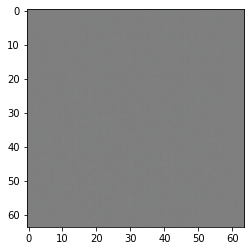

In [24]:
x = np.random.normal(size=(1,128))
y = generator(x)
plt.imshow(y[0])
plt.show()

In [34]:
root = Path().cwd()/"images"
duckduckgo_search(root, "Muffins", "single muffin chocolate", max_results=480)

Duckduckgo search: single muffin chocolate


[WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/021_4f7f9718.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/022_10ee8122.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/023_33e4e1b0.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/024_d936deee.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/025_a4ed94ee.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/026_4f70b07d.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/027_2f6ba922.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/028_0d2adf5b.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/029_20dcbda9.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/030_0ec27633.jpg'),
 WindowsPath('C:/Users/bloqd/Documents/Uni/MRO/Zadanie 5/images/Muffins/031_fe6f

Found 458 files belonging to 1 classes.


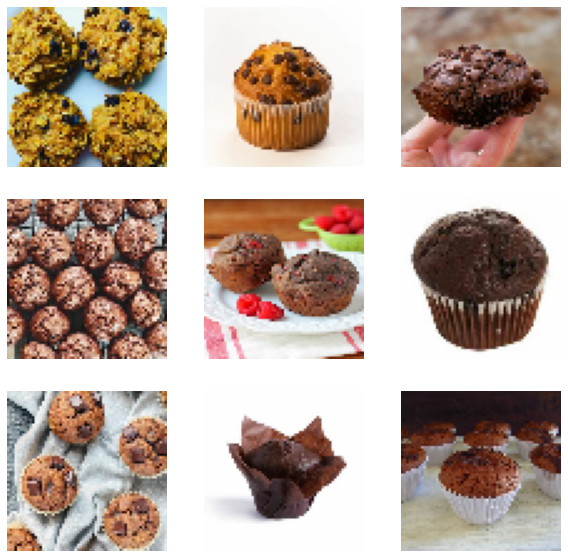

In [94]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  root,
  image_size=(64, 64),
  batch_size=458
)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [95]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
images, labels_batch = next(iter(normalized_ds))
first_image = images[0]
print(np.min(first_image), np.max(first_image))
images.shape


0.0 1.0


TensorShape([458, 64, 64, 3])

In [96]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.05),
  tf.keras.layers.RandomZoom(height_factor=(0,-0.05))
])

(458, 64, 64, 3)
(458, 64, 64, 3)
(458, 64, 64, 3)
(458, 64, 64, 3)
(458, 64, 64, 3)
(458, 64, 64, 3)
(458, 64, 64, 3)
(458, 64, 64, 3)
(458, 64, 64, 3)


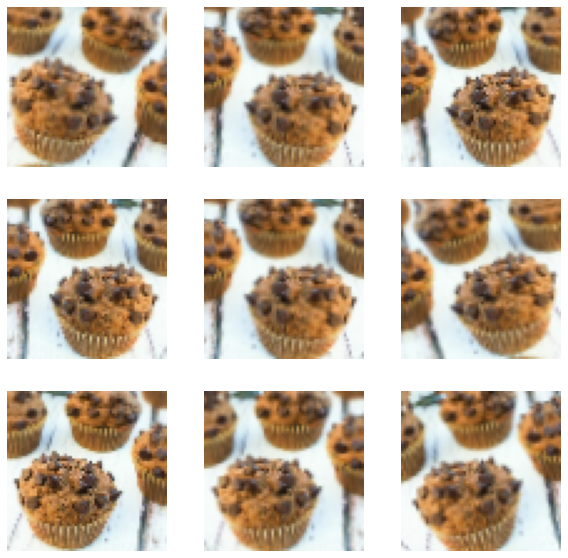

In [97]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(images)
  print(augmented_image.shape)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [98]:
images = tf.concat([images, data_augmentation(images)],0)
images = tf.concat([images, data_augmentation(images)],0)
images = tf.concat([images, data_augmentation(images)],0)

In [99]:
images.shape

TensorShape([3664, 64, 64, 3])

In [107]:
import tensorflow.keras.backend as kb
def custom_loss(y_actual,y_pred):
    return kb.square(y_actual-y_pred)

rozruch_data = np.array([[[2,2,4],[2,2,4]],[[2,2,4],[2,2,4]]])

rozruch = tf.keras.Sequential()
rozruch.add(tf.keras.layers.Input(shape=(2,2,3)))
rozruch.add(tf.keras.layers.Dense(3))
rozruch.add(tf.keras.layers.Dense(3))
rozruch.summary()

rozruch.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss=custom_loss, metrics=['accuracy'])
# grads = kb.gradients(rozruch.output, rozruch.input)

with tf.GradientTape() as gtape:
    grads = gtape.gradient(rozruch.output, rozruch.input)

print(grads)
# plot_results(history8)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 2, 2, 3)           12        
_________________________________________________________________
dense_20 (Dense)             (None, 2, 2, 3)           12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________
None
